In [3]:
pip install diagrams

     |████████████████████████████████| 23.2 MB 7.9 MB/s eta 0:00:011   |█████▌                          | 4.0 MB 3.3 MB/s eta 0:00:06
     |████████████████████████████████| 125 kB 7.9 MB/s eta 0:00:01
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.0.1
    Uninstalling Jinja2-3.0.1:
      Successfully uninstalled Jinja2-3.0.1
Note: you may need to restart the kernel to use updated packages.


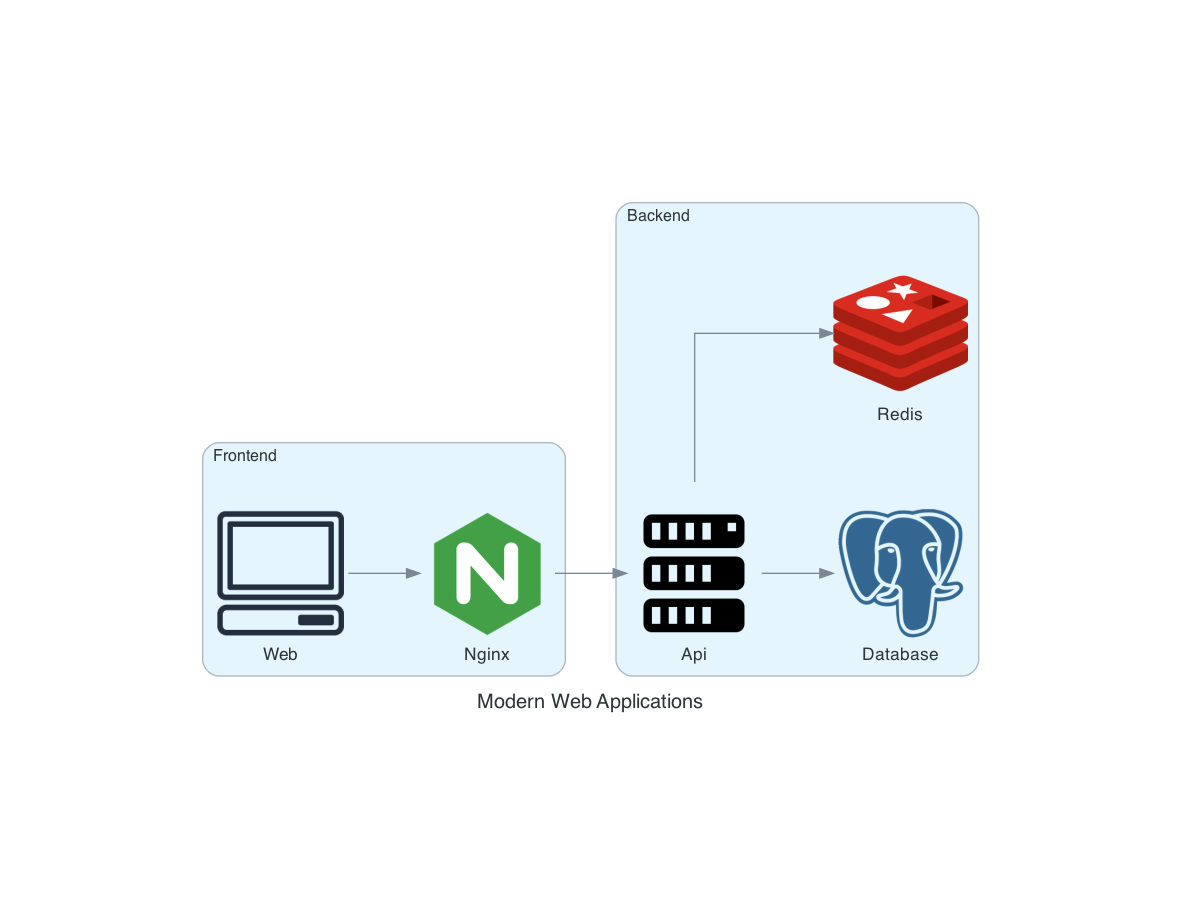

In [14]:
from diagrams import Cluster, Diagram
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.network import Nginx
from diagrams.onprem.client import Client

with Diagram("Modern Web Applications", show=False, filename="modern_web_app", node_attr={
    "shape":"box", 
    "margin":"0", 
}) as diag:
    with Cluster("Frontend"):
        client = Client("Web")
        nginx = Nginx("Nginx")
        client >> nginx
        
    with Cluster("Backend"):
        redis = Redis("Redis")
        postgres = PostgreSQL("Database")
        api = Server("Api")
        api >> [
            postgres, redis
        ]
    
    nginx >> api 
        
diag

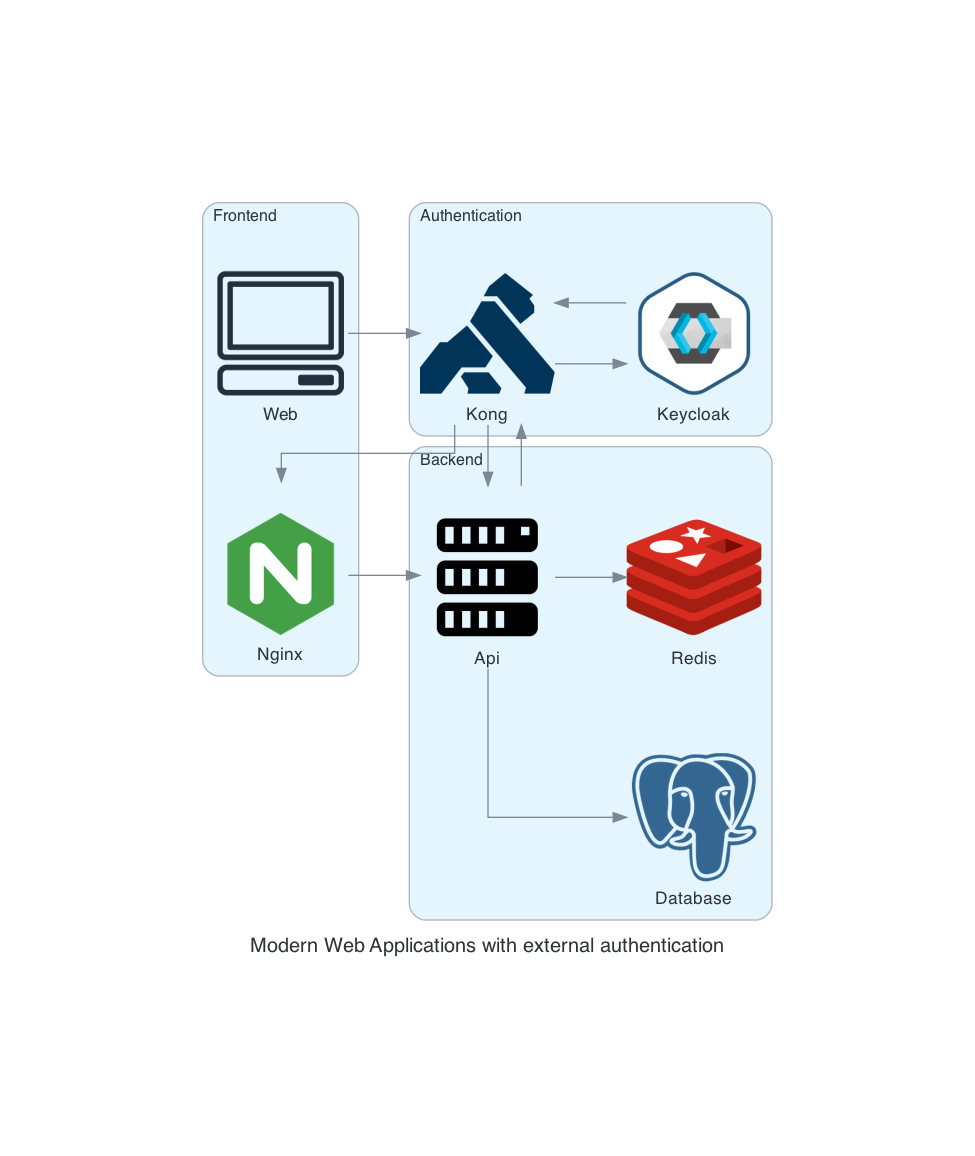

In [19]:
from diagrams import Cluster, Diagram
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.network import Nginx
from diagrams.onprem.client import Client
from diagrams.onprem.network import Kong
from diagrams.custom import Custom



with Diagram("Modern Web Applications with external authentication", show=False, filename="modern_web_app_with_auth", node_attr={
    "shape":"box", 
    "margin":"0", 
}) as diag:
    with Cluster("Frontend"):
        client = Client("Web")
        nginx = Nginx("Nginx")
    with Cluster("Authentication"):
        keycloak = Custom("Keycloak", "./keycloak.png")
        kong = Kong("Kong")
        client >> kong
        kong >> nginx
        kong >> keycloak >> kong 

    with Cluster("Backend"):
        redis = Redis("Redis")
        postgres = PostgreSQL("Database")
        api = Server("Api")
        api >> [
            postgres, redis
        ]
        kong >> api >> kong
    
    nginx >> api 
        
diag